**Loading the Data**

In [46]:
import pandas as pd

recycling_df = pd.read_csv("Recycling_Diversion_and_Capture_Rates_20250415.csv")
pop_df = pd.read_csv('New-York-City-Population-Total-Population-By-Year-2025-05-26-16-34.csv')

pop_df = pop_df.rename(columns={'Unnamed: 0':'Year', 'Population':'NYC_Population'})

**Pre-processing**

In [47]:
rate_cols = [col for col in recycling_df.columns if 'Rate' in col] # to identify rate columns

In [48]:
# find monthly means of each rate
monthly_means = (
    recycling_df
    .groupby(['Fiscal Year', 'Fiscal Month Number', 'Month Name'])[rate_cols]
    .mean()
    .reset_index()
)

In [49]:
# Merge Recycling and Population data by year
merged_df = pd.merge(
    monthly_means,
    pop_df,
    left_on='Fiscal Year',
    right_on='Year',
    how='left'
).drop(columns=['Year'])


In [50]:
merged_df = merged_df.sort_values(['Fiscal Year', 'Fiscal Month Number']).reset_index(drop=True)

In [51]:
print(merged_df.head())

   Fiscal Year  Fiscal Month Number Month Name  \
0         2016                    1       July   
1         2016                    2     August   
2         2016                    3  September   
3         2016                    4    October   
4         2016                    5   November   

   Diversion Rate-Total (Total Recycling / Total Waste)  \
0                                          15.571186      
1                                          15.732203      
2                                          16.325424      
3                                          16.355932      
4                                          15.925424      

   Capture Rate-Paper (Total Paper / Max Paper)  \
0                                     36.698305   
1                                     36.927119   
2                                     38.869492   
3                                     38.301695   
4                                     36.903390   

   Capture Rate-MGP (Total MGP / Max 

In [52]:
print(merged_df.shape)

(48, 8)


In [53]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Fiscal Year                                                                              48 non-null     int64  
 1   Fiscal Month Number                                                                      48 non-null     int64  
 2   Month Name                                                                               48 non-null     object 
 3   Diversion Rate-Total (Total Recycling / Total Waste)                                     48 non-null     float64
 4   Capture Rate-Paper (Total Paper / Max Paper)                                             48 non-null     float64
 5   Capture Rate-MGP (Total MGP / Max MGP)                             

In [54]:
merged_df.describe()

,Fiscal Year,Fiscal Month Number,Diversion Rate-Total (Total Recycling / Total Waste),Capture Rate-Paper (Total Paper / Max Paper),Capture Rate-MGP (Total MGP / Max MGP),Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100,NYC_Population
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,4.800000e+01
mean,2017.500000,6.500000,17.483792,38.430191,61.224223,46.157345,1.877275e+07
std,1.129865,3.488583,0.950790,1.619305,3.601423,1.872245,4.486789e+04
min,2016.000000,1.000000,15.571186,34.672881,51.766102,41.327119,1.870500e+07
25%,2016.750000,3.750000,16.832203,37.104661,59.100847,44.910593,1.874775e+07
50%,2017.500000,6.500000,17.329661,38.289831,61.699153,46.407627,1.878350e+07
75%,2018.250000,9.250000,18.036017,39.591949,64.107627,47.354661,1.880850e+07
max,2019.000000,12.000000,19.532203,41.845763,66.140678,49.891525,1.881900e+07


In [55]:
merged_df.columns

Index(['Fiscal Year', 'Fiscal Month Number', 'Month Name',
       'Diversion Rate-Total (Total Recycling / Total Waste)',
       'Capture Rate-Paper (Total Paper / Max Paper)',
       'Capture Rate-MGP (Total MGP / Max MGP)',
       'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100',
       'NYC_Population'],
      dtype='object')

In [56]:
merged_df = merged_df.rename(columns={
    'Fiscal Month Number': 'fiscal_month',
    'Fiscal Year': 'fiscal_year',
    'Month Name': 'month_name',
    'Diversion Rate-Total (Total Recycling / Total Waste)': 'diversion_rate_total',
    'Capture Rate-Paper (Total Paper / Max Paper)': 'capture_rate_paper',
    'Capture Rate-MGP (Total MGP / Max MGP)': 'capture_rate_mgp',
    'Capture Rate-Total ((Total Recycling - Leaves (Recycling)) / (Max Paper + Max MGP))x100': 'capture_rate_total_adjusted',
    'NYC_Population': 'nyc_population'
})

In [57]:
# Create a new 'period' column by combining 'fiscal_year' and 'fiscal_month'
merged_df['period'] = pd.to_datetime(
    merged_df['fiscal_year'].astype(str) + '-' +
    merged_df['fiscal_month'].astype(str).str.zfill(2) + '-01'
)

In [58]:
numeric_cols = [
    'diversion_rate_total',
    'capture_rate_paper',
    'capture_rate_mgp',
    'capture_rate_total_adjusted',
    'nyc_population'
]

for col in numeric_cols:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

In [59]:
missing = merged_df.isnull().sum().sort_values(ascending=False) # find missing values
print(missing)

fiscal_year                    0
fiscal_month                   0
month_name                     0
diversion_rate_total           0
capture_rate_paper             0
capture_rate_mgp               0
capture_rate_total_adjusted    0
nyc_population                 0
period                         0
dtype: int64


In [60]:
merged_df.duplicated().sum() # find duplicated values

np.int64(0)

In [61]:
merged_df = merged_df.drop(['month_name'], axis=1) # drop 'month_name' as now have a 'period' column

**EDA**

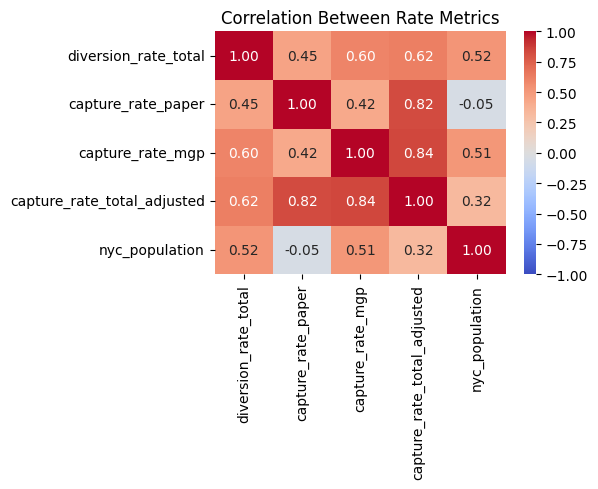

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = merged_df[numeric_cols].corr().round(2)
plt.figure(figsize=(6,5))
corr = merged_df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Between Rate Metrics")
plt.tight_layout()
plt.show()

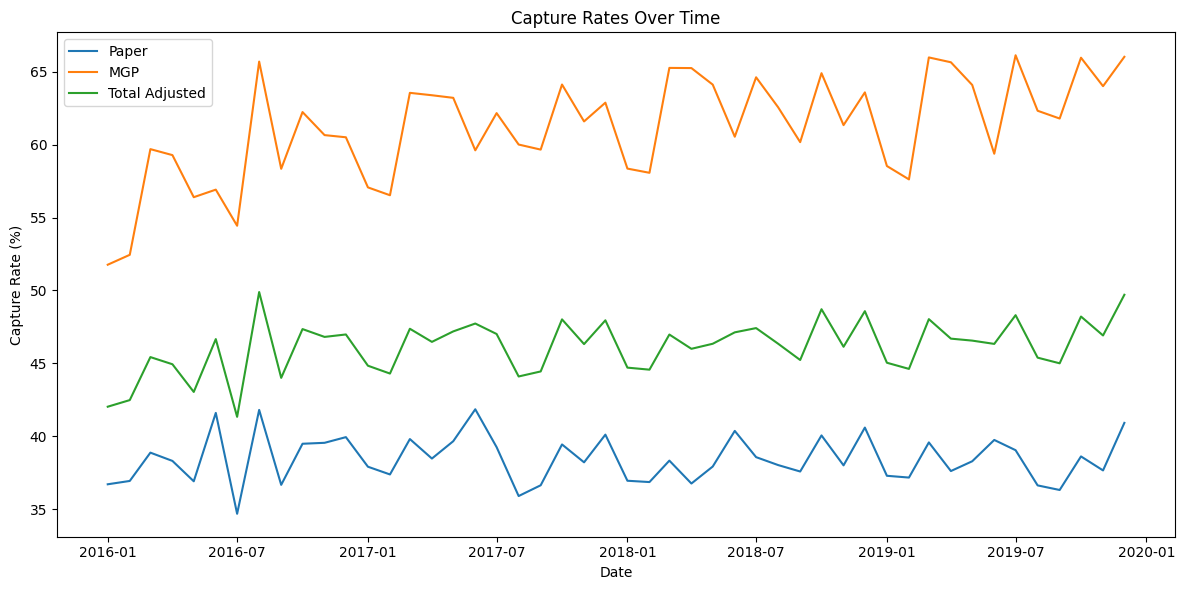

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
sns.lineplot(x='period', y='capture_rate_paper', data=merged_df, label='Paper')
sns.lineplot(x='period', y='capture_rate_mgp', data=merged_df, label='MGP')
sns.lineplot(x='period', y='capture_rate_total_adjusted', data=merged_df, label='Total Adjusted')
plt.title('Capture Rates Over Time')
plt.xlabel('Date')
plt.ylabel('Capture Rate (%)')
plt.legend()
plt.tight_layout()
plt.show()

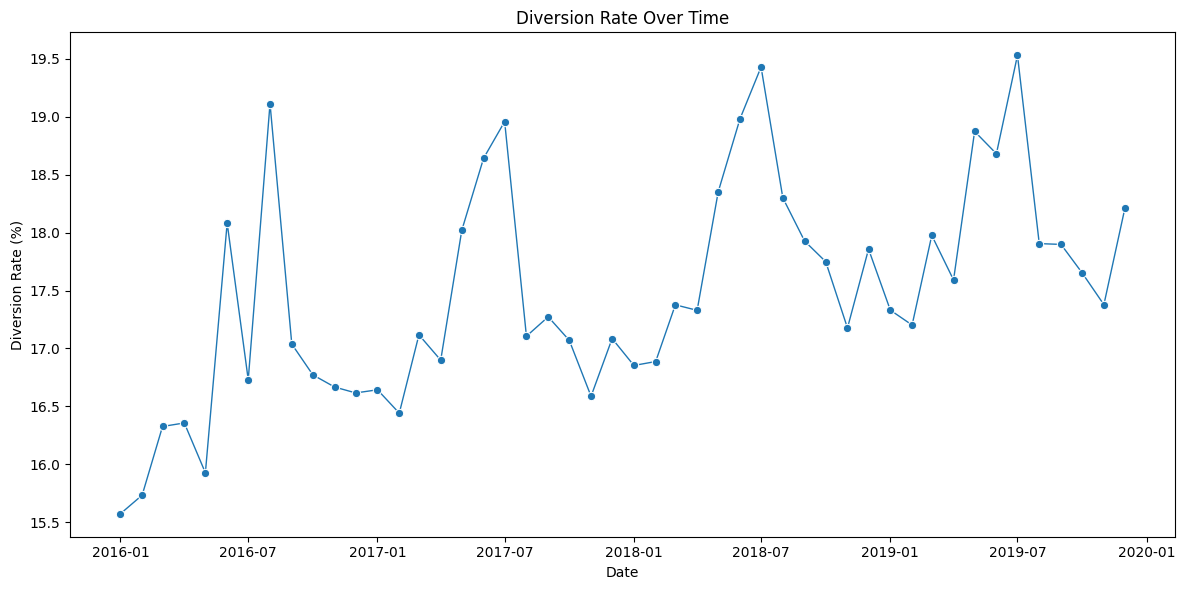

In [64]:
plt.figure(figsize=(12,6))
sns.lineplot(x='period',
             y='diversion_rate_total',
             data=merged_df,
             marker="o",
             linewidth=1)
plt.title("Diversion Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Diversion Rate (%)")
plt.tight_layout()
plt.show()


**Machine learning**

In [65]:
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

In [66]:
# Create X (features) and y (target)
target_col = 'diversion_rate_total'
X = merged_df.drop(target_col, axis=1)
y = merged_df[target_col]

In [67]:
# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [68]:
numeric_cols = X.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object','category']).columns.tolist()

In [69]:
# Scaling of numeric features to minimise effect of outliers
scaler = RobustScaler()
X_train_numeric = scaler.fit_transform(X_train[numeric_cols])
X_test_numeric  = scaler.transform(X_test[numeric_cols])

In [70]:
# One-hot encoding of categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_train_categorical = encoder.fit_transform(X_train[categorical_cols])
X_test_categorical  = encoder.transform(X_test[categorical_cols])

In [71]:
# Combine processed features
X_train_processed = np.hstack([X_train_numeric, X_train_categorical])
X_test_processed  = np.hstack([X_test_numeric,  X_test_categorical])

**Linear Regression**

In [72]:
# Initialise and train the model
lr = LinearRegression()
lr.fit(X_train_processed, y_train)

LinearRegression()

In [73]:
# Predict y when given the test set (X_Test)
y_pred_lr = lr.predict(X_test_processed)

In [74]:
# Evaluation metrics for Linear Regression
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:",  r2_score(y_test, y_pred_lr))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))

MSE: 0.2606248793494082
R²: 0.5271338118648893
RMSE: 0.5105143282508418
MAE: 0.47443840174158325


In [75]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred_lr.reshape(len(y_pred_lr),1), y_test.values.reshape(len(y_test),1)),1))

[[17.85 17.33]
 [18.22 18.87]
 [18.25 17.38]
 [17.56 17.91]
 [17.34 16.85]
 [17.37 17.2 ]
 [16.96 16.64]
 [16.74 17.11]
 [16.51 15.93]
 [17.31 16.89]]


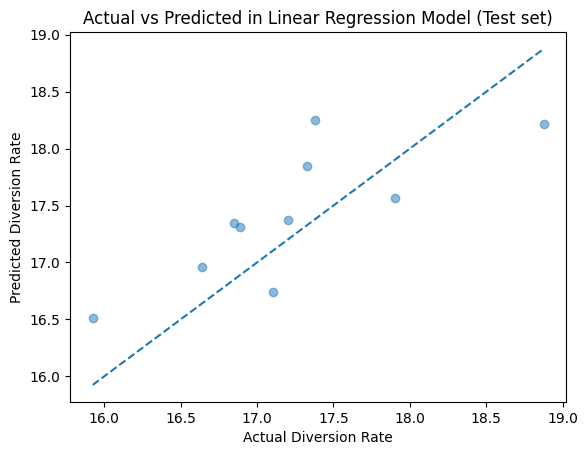

In [76]:
# Scatter plot to visualize the actual vs. predicted values

plt.figure()
plt.scatter(y_test, y_pred_lr, alpha=0.5)

min_val = min(y_test.min(), y_pred_lr.min())
max_val = max(y_test.max(), y_pred_lr.max())

plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel('Actual Diversion Rate')
plt.ylabel('Predicted Diversion Rate')
plt.title('Actual vs Predicted in Linear Regression Model (Test set)')
plt.show()


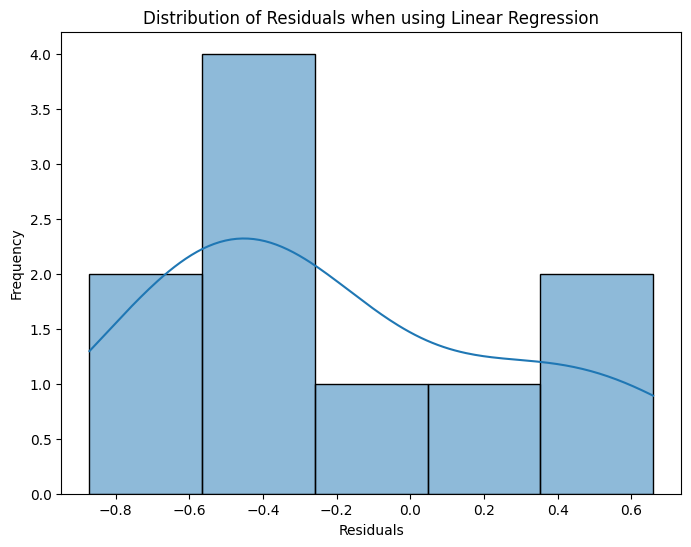

In [77]:
# Residuals Distribution Plot for Linear Regression

residuals = y_test - y_pred_lr
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals when using Linear Regression')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [78]:
# Cross-Validation for Linear Regression
cv_scores_lr = cross_val_score(lr, X_train_processed, y_train, cv=5, scoring='r2')
print("Linear Regression CV R² Scores:", cv_scores_lr)

Linear Regression CV R² Scores: [-0.63  0.72  0.51  0.12 -0.78]


**Random Forest**

In [79]:
# Initialize and train the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train_processed, y_train)

RandomForestRegressor(random_state=42)

In [80]:
# Grid of hyperparameter tunning for Random Forest

param_grid_rf = {
    'n_estimators': [50, 100, 150, 200, 500, 1000],
    'max_depth': [None, 10, 15, 20, 25],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2']
}
# GridSearchCV to find the best hyperparameter

grid_search_rf = GridSearchCV(estimator=rf,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='r2',
                              n_jobs=-1)

grid_search_rf.fit(X_train_processed, y_train) # fit on the training data to find best parameters

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20, 25],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150, 200, 500, 1000]},
             scoring='r2')

In [81]:
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best cross-validation R² score:", grid_search_rf.best_score_)
best_rf_model = grid_search_rf.best_estimator_

Best hyperparameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation R² score: 0.48635298221288004


In [82]:
# Evaluation Metrics for Random Forest
y_pred_best_rf = best_rf_model.predict(X_test_processed)
test_mse_best_rf = mean_squared_error(y_test, y_pred_best_rf)
test_r2_best_rf = r2_score(y_test, y_pred_best_rf)
test_rmse_best_rf = np.sqrt(test_mse_best_rf)
test_mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)

print("Test MSE:", test_mse_best_rf)
print("Test R²:",  test_r2_best_rf)
print("Test RMSE:", test_rmse_best_rf)
print("Test MAE:", test_mae_best_rf)

Test MSE: 0.27878743602413125
Test R²: 0.49418047693000755
Test RMSE: 0.5280032538007046
Test MAE: 0.422071186440677


In [83]:
y_pred_rf = rf.predict(X_test_processed)
print(np.concatenate((y_pred_best_rf.reshape(len(y_pred_best_rf),1), y_test.values.reshape(len(y_test),1)),1))

[[17.84 17.33]
 [17.97 18.87]
 [18.22 17.38]
 [17.86 17.91]
 [17.31 16.85]
 [17.26 17.2 ]
 [16.66 16.64]
 [17.34 17.11]
 [16.68 15.93]
 [17.28 16.89]]


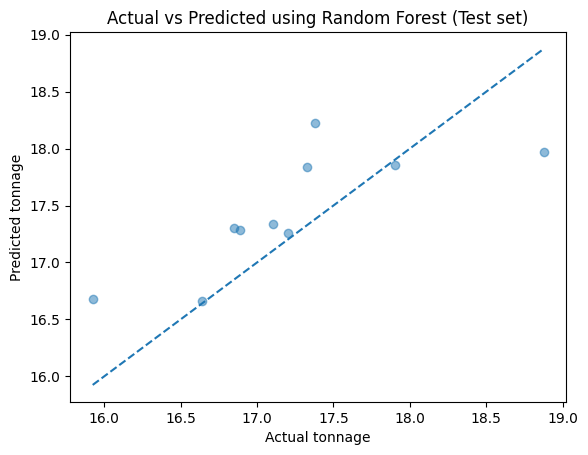

In [84]:
# Scatter plot to visualize the actual vs. predicted values in Random Forest
plt.figure()
plt.scatter(y_test, y_pred_best_rf, alpha=0.5)
min_val = min(y_test.min(), y_pred_best_rf.min())
max_val = max(y_test.max(), y_pred_best_rf.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel('Actual tonnage')
plt.ylabel('Predicted tonnage')
plt.title('Actual vs Predicted using Random Forest (Test set)')
plt.show()

In [85]:
# Cross-Validation for Random Forest
cv_scores_rf = cross_val_score(rf, X_train_processed, y_train, cv=5, scoring='r2')
print("Random Forest CV R² Scores:", cv_scores_rf)

Random Forest CV R² Scores: [0.67 0.74 0.74 0.53 0.33]


<ipython-input-86-44b0c1c17b3d>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


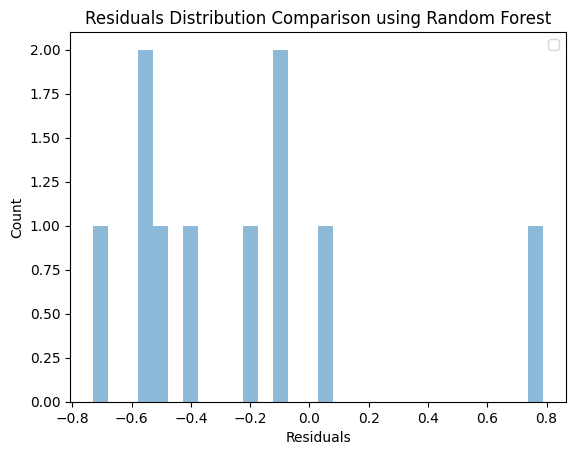

In [86]:
# Residuals Distribution Plot for Random Forest
resid_rf = y_test - y_pred_rf

plt.figure()
plt.hist(resid_rf, bins=30, alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Residuals Distribution Comparison using Random Forest')
plt.legend()
plt.show()

**XG Boosting**

In [87]:
import numpy as np
!pip install xgboost
from xgboost import XGBRegressor

In [88]:
xgb = XGBRegressor(random_state=42)  # Initialise XGBRegressor model

In [89]:
# Hyperparameter tunning for XG Boosting
param_grid = {
    'n_estimators': [50, 100, 200, 500, 1000],
    'max_depth': [None, 10, 15, 20, 25],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5]
}
# RandomizedSearchCV to find the best parameter grid
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    cv=5, # 5 fold cross validation
    scoring='r2', # Using R² as the evaluation metric
    n_jobs=-1,
    verbose=1
)
grid_search.fit(X_train_processed, y_train)

Fitting 5 folds for each of 2025 candidates, totalling 10125 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0, 1, 5], 'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [None, 10, 15, 20, 25],
                         'n_estimators': [50, 100, 200, 500, 1000],
                         'subsample': [0.6, 0.8, 1.0]},
             scoring='r2', verbose=1)

In [93]:
print("Best hyperparameters for XGB:", grid_search.best_params_)
print("Best cross-validation R² score:", grid_search.best_score_)
best_xgb_model = grid_search.best_estimator_

Best hyperparameters for XGB: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.2, 'max_depth': 15, 'n_estimators': 1000, 'subsample': 0.8}
Best cross-validation R² score: 0.7630109176096544


In [94]:
y_pred_best_xgb = best_xgb_model.predict(X_test_processed) # predict on the test set using the tuned XGBoost model

In [95]:
# XGB evaluation metrics
test_mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
test_r2_best_xgb = r2_score(y_test, y_pred_best_xgb)
test_rmse_best_xgb = np.sqrt(test_mse_best_xgb)
test_mae_best_xgb = mean_absolute_error(y_test, y_pred_best_xgb)

print("Test MSE:", test_mse_best_xgb)
print("Test R²:",  test_r2_best_xgb)
print("Test RMSE:", test_rmse_best_xgb)
print("Test MAE:", test_mae_best_xgb)

Test MSE: 0.1552136702370111
Test R²: 0.7183872208415003
Test RMSE: 0.39397166171821435
Test MAE: 0.3317285052800578


In [98]:
print(np.concatenate((y_pred_best_xgb.reshape(len(y_pred_best_xgb),1), y_test.values.reshape(len(y_test),1)),1))

[[17.81 17.33]
 [18.41 18.87]
 [17.8  17.38]
 [18.01 17.91]
 [17.14 16.85]
 [17.16 17.2 ]
 [16.45 16.64]
 [17.27 17.11]
 [16.73 15.93]
 [17.23 16.89]]


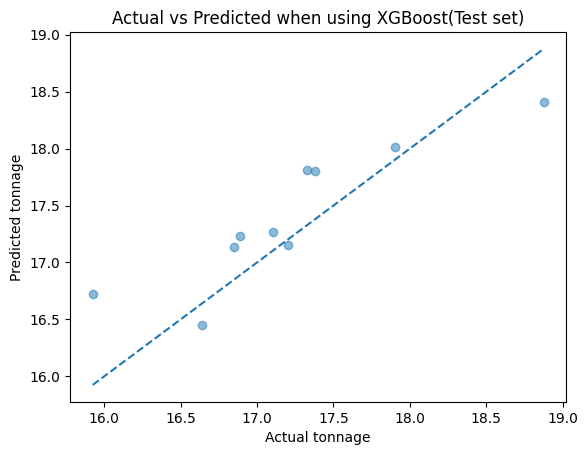

In [99]:
# Scatter plot for the XGBoost model's predictions (Actual vs. Predicted)
plt.figure()
plt.scatter(y_test, y_pred_best_xgb, alpha=0.5)
min_val = min(y_test.min(), y_pred_best_xgb.min())
max_val = max(y_test.max(), y_pred_best_xgb.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.xlabel('Actual tonnage')
plt.ylabel('Predicted tonnage')
plt.title('Actual vs Predicted when using XGBoost(Test set)')
plt.show()

<ipython-input-100-f60707943a7a>:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


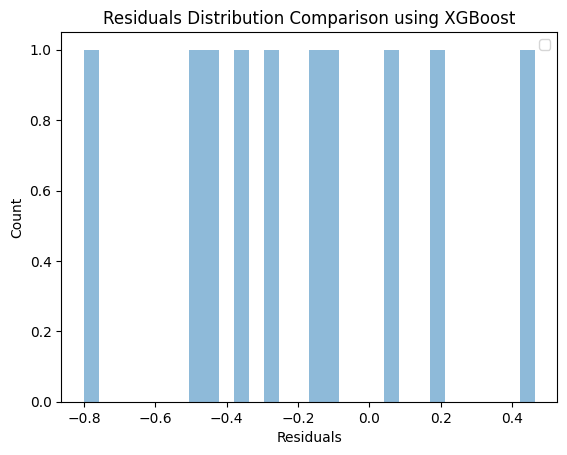

In [100]:
# Residuals Distribution Plot for XG Boost
resid_xgb = y_test - y_pred_best_xgb

plt.figure()
plt.hist(resid_xgb, bins=30, alpha=0.5)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.legend()
plt.title('Residuals Distribution Comparison using XGBoost')
plt.show()



In [101]:
# Cross-Validation for XG Boost
cv_scores_xgb = cross_val_score(xgb, X_train_processed, y_train, cv=5, scoring='r2')
print("XGBoost CV R² Scores:", cv_scores_xgb)

XGBoost CV R² Scores: [0.39 0.78 0.91 0.73 0.5 ]


**Comparison of Models**

In [102]:
# Model Performance Comparison Table
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

mse_rf = mean_squared_error(y_test, y_pred_best_rf)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, y_pred_best_rf)
r2_rf = r2_score(y_test, y_pred_best_rf)

mse_xgb = mean_squared_error(y_test, y_pred_best_xgb)
rmse_xgb = np.sqrt(mse_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_best_xgb)
r2_xgb = r2_score(y_test, y_pred_best_xgb)

results = pd.DataFrame({
    'Model': ['LinearRegression', 'RandomForest', "XGBoost"],
    'Test MSE': [mse_lr, mse_rf, mse_xgb],
    'Test RMSE': [rmse_lr, rmse_rf, rmse_xgb],
    'Test MAE': [mae_lr, mae_rf, mae_xgb],
    'Test R²': [r2_lr, r2_rf, r2_xgb]
})
print(results)

              Model  Test MSE  Test RMSE  Test MAE   Test R²
0  LinearRegression  0.260625   0.510514  0.474438  0.527134
1      RandomForest  0.278787   0.528003  0.422071  0.494180
2           XGBoost  0.155214   0.393972  0.331729  0.718387


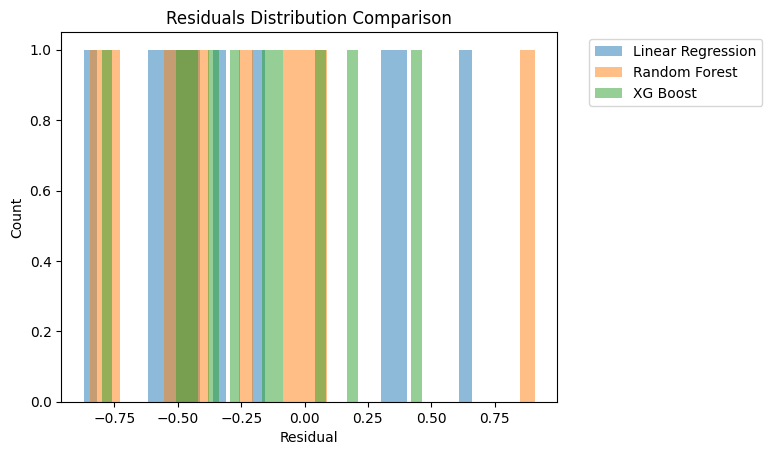

In [104]:
# Combined Residuals Distribution Plot
resid_lr = y_test - y_pred_lr
resid_rf = y_test - y_pred_best_rf
resid_xgb = y_test - y_pred_best_xgb
plt.figure()
plt.hist(resid_lr, bins=30, alpha=0.5, label='Linear Regression')
plt.hist(resid_rf, bins=30, alpha=0.5, label='Random Forest')
plt.hist(resid_xgb, bins=30, alpha=0.5, label='XG Boost')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.title('Residuals Distribution Comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()